# トピックモデル

## 潜在的ディリクレ配分法（LDA＝Latent Dirichlet Allocation）

なんとなく理解するのは以下のスライドがよさげ。  
https://www.slideshare.net/kogecoo/ss-47464673


In [2]:
from gensim import corpora, models, similarities
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word
)

topics = [model[c] for c in corpus]
print(topics[0])

FileNotFoundError: [Errno 2] No such file or directory: './data/ap/vocab.txt'

**API Reference**

| API | API Reference |
| ------------------- | ------------- |
| corpor.BleiCorpus | https://radimrehurek.com/gensim/corpora/bleicorpus.html |
| models.ldamodel | https://radimrehurek.com/gensim/models/ldamodel.html |

ここでドキュメントのトピック数をグラフにしてみる。

/Users/sekineyasufumi/.local/share/virtualenvs/BuildingMachineLearningSystemsWithPython-Wi63DfR9/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


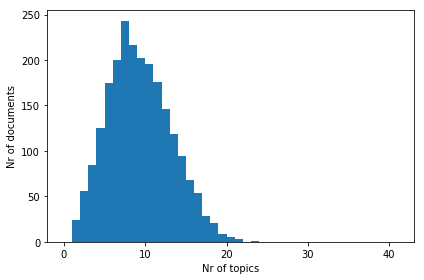

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.show()

models.ldamodel.LdaModelのalphaを変更すれば、１文書あたりに持つトピック数を変更することができる。

/Users/sekineyasufumi/.local/share/virtualenvs/BuildingMachineLearningSystemsWithPython-Wi63DfR9/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/Users/sekineyasufumi/.local/share/virtualenvs/BuildingMachineLearningSystemsWithPython-Wi63DfR9/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


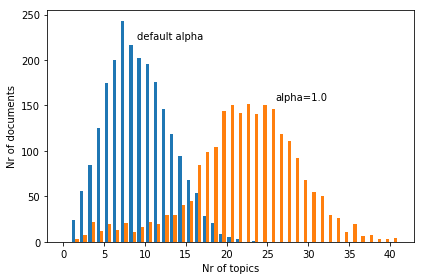

In [16]:
model1 = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word,
    alpha=1
)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()
fig.show()

In [1]:
# work cloud として表示する

from wordcloud import WordCloud

def makeWordCloud(text):
    wc = WordCloud(max_word=1000,margin=10,random_state=1).generate(text)
    
    plt.imshow(wc)

counts = np.zeros(100)

# 最も頻出するトピックを選ぶ
for doc_topics in topics:
    for topic_id, _ in doc_topics:
        counts[topic_id] += 1
topic_words = model.show_topic(counts.argmax(), 64)
words = [e[0] for e in topic_words]
text = " ".join(words)
makeWordCloud(text)

NameError: name 'np' is not defined